In [14]:
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


Задание 1

Вернемся к набору данных о видеоиграх.

Ответьте на следующие вопросы:

    Как критики относятся к спортивным играм?
    Критикам нравятся больше игры на PC или на PS4?
    Критикам больше нравятся стрелялки или стратегии?

Для каждого вопроса:

    сформулируйте нулевую и альтернативную гипотезы;
    выберите пороговый уровень статистической значимости;
    опишите полученные результаты статистического теста.



In [2]:
games = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/stat_case_study/vgsales.csv')

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


### Предобработка данных

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [5]:
games['User_Score'] = games['User_Score'].replace('tbd', np.nan)

In [6]:
games['Year_of_Release'] = games['Year_of_Release'].astype('Int64')
games['User_Count'] = games['User_Count'].astype('Int64')
games['User_Score'] = games['User_Score'].astype('float64')
games['Critic_Count'] = games['Critic_Count'].astype('Int64')
games['User_Score'] = games['User_Score'] * 10

Как критики относятся к спортивным играм?

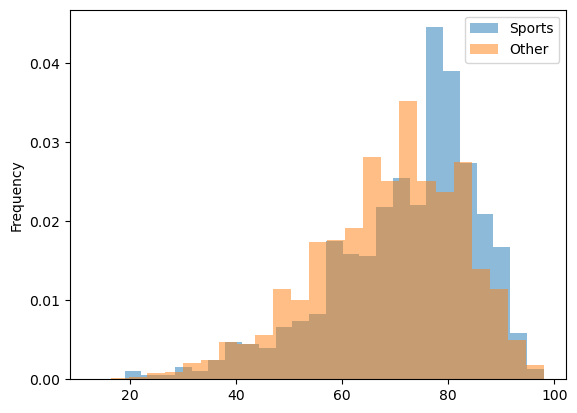

In [21]:
games[games['Genre']=='Sports']['Critic_Score'].plot(kind='hist', alpha = 0.5, bins=25, density = True)
games[games['Genre']!='Sports']['Critic_Score'].plot(kind='hist', alpha = 0.5, bins=25, density = True)
plt.legend(['Sports', 'Other'])

H1: Спортивные игры критикам нравятся больше
H0: Различий нет

<AxesSubplot:xlabel='Critic_Score', ylabel='Count'>

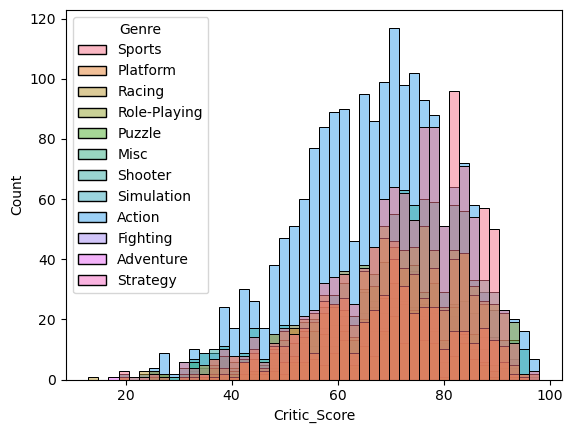

In [9]:
sns.histplot(games, x= 'Critic_Score', hue='Genre')

In [25]:
test = stats.ttest_ind(games[games['Genre']=='Sports']['Critic_Score'].dropna(), games[games['Genre']!='Sports']['Critic_Score'].dropna(), equal_var=False)

In [26]:
if test.pvalue < 0.05:
    print("Различия значимы. спортивные игры критикам нравятся больше остальных")

Различия значимы. спортивные игры критикам нравятся больше остальных


Критикам нравятся больше игры на PC или на PS4?

In [29]:
games.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [30]:
cr_score = games[(games.Platform =="PC")|(games.Platform == "PS4")][['Platform', 'Critic_Score']]

In [31]:
cr_score.head()

,Platform,Critic_Score
31,PS4,NaN
42,PS4,97.0
77,PS4,82.0
85,PC,86.0
87,PS4,NaN


In [32]:
cr_score.pivot_table(columns = 'Platform')

Platform,PC,PS4
Critic_Score,75.928671,72.09127


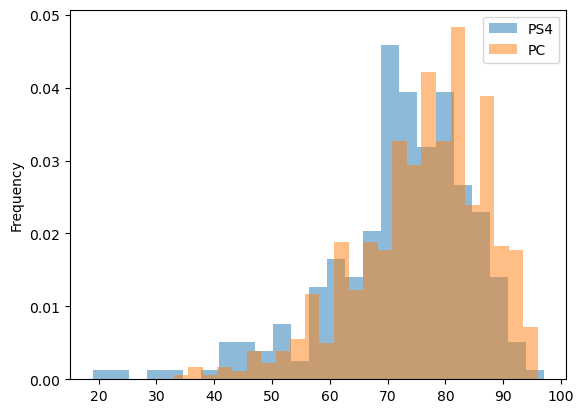

In [35]:
cr_score[cr_score['Platform']=='PS4']['Critic_Score'].plot(kind='hist', bins = 25, alpha=0.5, density=True)
cr_score[cr_score['Platform']=='PC']['Critic_Score'].plot(kind='hist', bins = 25, alpha = 0.5, density=True)
plt.legend(['PS4', 'PC'])

H1: Игры на PC нравятся больше
H0: Различий нет

In [36]:
test = stats.ttest_ind(cr_score[cr_score['Platform']=='PS4']['Critic_Score'].dropna(), cr_score[cr_score['Platform']=='PC']['Critic_Score'].dropna())

In [37]:
if test.pvalue > 0.05:
    print("Различия статистически незначимы")
else:
    print("Различия значимы, критики предпочитают PC")

Различия значимы, критики предпочитают PC


Критикам больше нравятся стрелялки или стратегии?

In [38]:
games.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [39]:
cr_score_2 = games[(games.Genre =='Shooter')|(games.Genre == "Strategy")][['Genre', 'Critic_Score']]

In [40]:
cr_score_2.head()

,Genre,Critic_Score
9,Shooter,NaN
29,Shooter,88.0
31,Shooter,NaN
32,Shooter,87.0
34,Shooter,83.0


<AxesSubplot:xlabel='Critic_Score', ylabel='Density'>

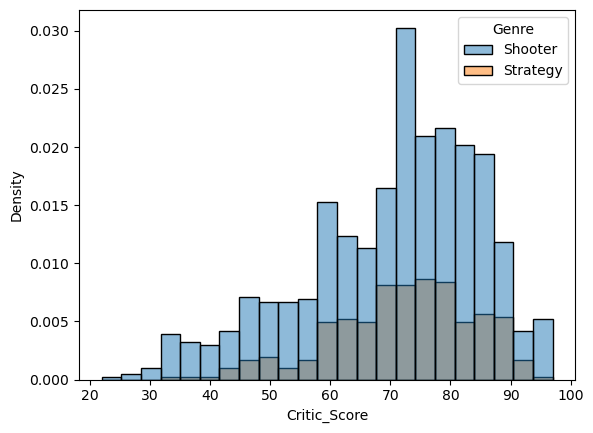

In [41]:
sns.histplot(cr_score_2, x='Critic_Score', hue='Genre', stat = 'density')

In [74]:
cr_score_2.pivot_table(columns = 'Genre')

Genre,Shooter,Strategy
Critic_Score,70.181144,72.086093


H1: Стратегии нравятся больше
H0: Различий нет

In [42]:
test = stats.ttest_ind(games[games['Genre']=='Strategy']['Critic_Score'].dropna(), games[games['Genre']=='Shooter']['Critic_Score'].dropna())

In [43]:
if test.pvalue<0.05:
    print("Различия значимы, стратегии любят больше")

Различия значимы, стратегии любят больше
